<a href="https://colab.research.google.com/github/jibook/git-remote/blob/master/16_class_PCA(%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA (주성분 분석 : 비지도 학습)

### PCA 주성분분석

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

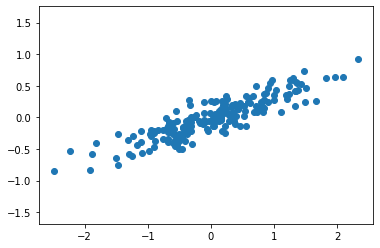

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')

성분(component) : 벡터의 방향

설명분산(explained variance) : 해당벡터의 제곱길이

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
mypca = PCA(n_components=2)
mypca.fit(X)

PCA(n_components=2)

In [ ]:
print(mypca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(mypca.explained_variance_)

[0.7625315 0.0184779]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

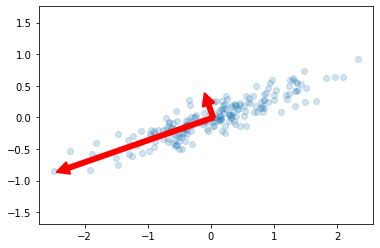

In [ ]:
from matplotlib.patches import ArrowStyle
def draw_vector(v0,v1,ax=None):
  ax = ax or plt.gca()
  arrowprops = dict(color = 'red', ArrowStyle = 'simple', linewidth = 2, shrinkA = 0, shrinkB=0)
  ax.annotate('',v1, v0, arrowprops= arrowprops)


# data plottind
plt.scatter(X[:,0], X[:,1], alpha=0.2)
for length, vector in zip(mypca.explained_variance_, mypca.components_):
  v = vector *3* np.sqrt(length)
  draw_vector(mypca.mean_, mypca.mean_ +v)
plt.axis('equal')

차원축소 응용 : 주성분 중 가장작은 하나를 삭제해서 작은 차원으로 데이터 사영

In [ ]:
dimpca = PCA(n_components=1)
dimpca.fit(X)
X_pca = dimpca.transform(X)

print('original shape :', X.shape)
print('transform shape :', X_pca.shape)

original shape : (200, 2)
transform shape : (200, 1)


차원축소 & 자료 출력

(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

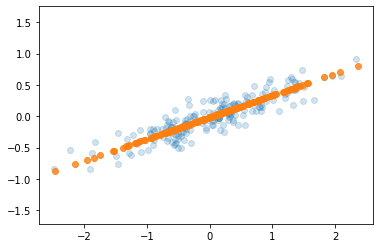

In [ ]:
# 역변환
X_new = dimpca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1], alpha=0.2)
plt.scatter(X_new[:,0],X_new[:,1], alpha=0.8)
plt.axis('equal')

### 특징추출 : 얼굴특징추출

In [ ]:
# 고유 얼굴 성분 찾기

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
face_pca = PCA(150)
face_pca.fit(faces.data)

PCA(n_components=150)

특징추출

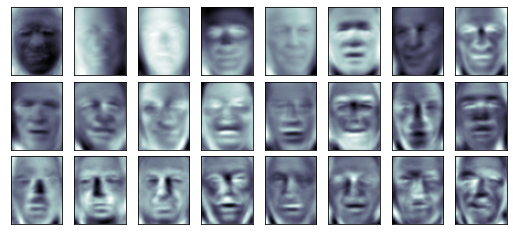

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9,4), 
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(face_pca.components_[i].reshape(62,47), cmap='bone')